### **One-Way ANOVA TEST**


*The aim of this analysis is to statistically know if the proposed controller placementgorithm truely has a significant low output loss when it is compared with the reviewed Mopso, NSGA-II and NSGA-III algorithms. The importance of this analysi is to help to identify the most recommended controller placement alorithm with the least significant output loss in the SDN.* 

This link https://www.reneshbedre.com/blog/anova.html?utm_content=cmp-true explains more on the ANOVA test method.


In [ ]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD and some other tests
# check documentation here https://github.com/reneshbedre/bioinfokit
!pip install bioinfokit

In [ ]:
# Conduct random sampling
import pandas as pd
import numpy as np

input_value = input("Enter 1 to conduct sampling or 0 to use the documented 11 sample size dataset")
if (int(input_value) == 1):
  #sample_size_input = input("Enter any value greater than 9:")
  sample_size_input = input("\n\n Enter 1 for sample size calculation at 95% Confidence Level \n OR \n enter your desired sample size that is >9:")
  if (int(sample_size_input) >= 10):  

      # Set the seed value for reproducibility
      np.random.seed(21)

      # load data file
      #df = pd.read_excel("final output loss.xlsx")
      df=pd.read_excel('final output loss.xlsx')

      #Sample the data:
      #Note: I decided not to use (sample = df.sample(n=sample_size, random_state=123, replace=False)) code 
      #becuase the independent sampling of each data column will reduce the sampling biasness.
      sample_size = int(sample_size_input)
      proposed  = np.random.choice(df['proposed'], sample_size, replace=False)
      mopso     = np.random.choice(df['mopso'], sample_size, replace=False)
      nsga2     = np.random.choice(df['nsga2'], sample_size, replace=False)
      nsga3     = np.random.choice(df['nsga3'], sample_size, replace=False)

      # Combine the vectors back into a DataFrame
      df = pd.DataFrame({'proposed': proposed, 'mopso': mopso, 'nsga2': nsga2, 'nsga3': nsga3})

      #write the new data to textfile and save it
      file_path = 'final output loss.csv'

      with open(file_path, 'w') as file:
          file.write(df['proposed'].to_string(index=False))
        
      # Print a confirmation message
      print(f"DataFrame written to file: {file_path}")
      print(df.tail(5))

  elif (int(sample_size_input) == 1):
      # Set the seed value for reproducibility
      seed1 = input("\n\n For reproducibility enter the seed number else 21 will be used instead: ")

      if (int(seed1) >= 0):
        seed_value = int(seed1)
      else:
        seed_value = 21  

      np.random.seed(seed_value)

      # load data file
      #df = pd.read_excel("final output loss.xlsx")
      df=pd.read_excel('final output loss.xlsx')

      ## calculate the sample size for each of the 4 algorithms

      #Below is the references for this sample size calculator
      #"Sample Size Calculator" by Creative Research Systems: https://www.surveysystem.com/sscalc.htm
      #"Sample Size Calculator" by SurveyMonkey: https://www.surveymonkey.com/mp/sample-size-calculator/
      #"Sample Size Calculator" by Raosoft: https://www.raosoft.com/samplesize.html
      #"Sample Size Calculator" by Social Science Statistics: https://www.socscistatistics.com/tests/samplesizecalculator/Default.aspx
      #"Sample Size Calculator" by National Institute of Standards and Technology: https://www.itl.nist.gov/div898/handbook/prc/section2/prc222.htm
  
      import math
      population_size = len(df)
      margin_of_error 	= 	0.05    #5% margin_of_error. This implies and 95% confidence level (1 - 5%)
      z                 =   1.96		#Z-score is obtained based on the confidence level
              
      # Calculate the minimum sample size
      sample_size = (z**2 * 0.25 * population_size) / ((margin_of_error**2) * (population_size - 1) + (z**2 * 0.25))
      sample_size = math.ceil(sample_size)

      print("\n\n Sample size per group: ", sample_size, " and the population size is :", population_size)

      print("\n\n The Seed value is: ", seed_value)

      #Sample the data:
      #Note: I decided not to use (sample = df.sample(n=sample_size, random_state=123, replace=False)) code 
      #becuase the independent sampling of each data column will reduce the sampling biasness.
      proposed  = np.random.choice(df['proposed'], sample_size, replace=False)
      mopso     = np.random.choice(df['mopso'], sample_size, replace=False)
      nsga2     = np.random.choice(df['nsga2'], sample_size, replace=False)
      nsga3     = np.random.choice(df['nsga3'], sample_size, replace=False)
      
      # Combine the vectors back into a DataFrame
      df = pd.DataFrame({'proposed': proposed, 'mopso': mopso, 'nsga2': nsga2, 'nsga3': nsga3})

      #write the new data to textfile and save it
      file_path = 'final output loss.csv'

      with open(file_path, 'w') as file:
          file.write(df['proposed'].to_string(index=False))
        
      # Print a confirmation message
      print(f"\n\n DataFrame written to file: {file_path}")
      print(df.tail(5))
  else:
      print("You entered the wrong value. The process will end now. Thank you.")
elif (int(input_value) == 0):
  #df = pd.read_csv("final output loss.txt", sep="\t")
  df=pd.read_csv("final output loss.txt", sep="\t")
  print("The built-in data of sample size 11 had been stored in the memory now.")
  print(df)
else:
  #The process ends
  print("You entered the wrong ressponse. I am sorry that the process will be abordted now. \n Kindly run the programme again. Thank you")

Enter 1 to conduct sampling or 0 to use the documented 11 sample size dataset1


 Enter 1 for sample size calculation at 95% Confidence Level 
 OR 
 enter your desired sample size that is >9:1


 For reproducibility enter the seed number else 21 will be used instead: 410


 Sample size per group:  209  and the population size is : 455


 The Seed value is:  410


 DataFrame written to file: final output loss.csv
       proposed        mopso        nsga2        nsga3
204  818.050222  1438.347339  1322.217006  1326.094859
205  758.452690  1492.154173   806.555049  1275.039106
206  999.225910  1438.179971  1361.737422   884.421999
207  716.596065  1540.748289  1443.265407   773.188143
208  841.837358  1492.154173  1365.462906  1404.441950


# **Data Importation**

*The network final output loss data for this analysis, with four columns, is importated below.*

In [ ]:
# load data file
#

# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['proposed', 'mopso', 'nsga2', 'nsga3'])

#print(df_melt)

# replace column names
df_melt.columns = ['index', 'treatments', 'value']

#print(df['proposed'])



---
## **The four controllers placement algorithms means**

*The network final output loss means for the four controllers placement algorithms (the Proposed algorithms, MOPSO, NSGA-II and NSGA-III algorithms) in the appropriate placement of controller in the SDN are:*

In [ ]:
print("The network final output loss means of the algorithms are: \n",df.mean())
print("\n ============================ \n")
print("The network final output loss variances of the algorithms are: \n",df.var())

The network final output loss means of the algorithms are: 
 proposed     936.018623
mopso       1459.347972
nsga2       1221.599093
nsga3       1142.605371
dtype: float64


The network final output loss variances of the algorithms are: 
 proposed    25139.335528
mopso        3067.111557
nsga2       32561.492155
nsga3       33732.179519
dtype: float64


# **Interpretation:**

This means that the proposed algorithm has the network final output loss means of 943.540408 while the MOPSO algorithms has the highest network final output loss means of 1459.861607. This study is interested to know if there is significant difference among these fours controller based on the network final output loss data. *


---


# **Box plot Presentation:**

*The Box plot is plotted below.*

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


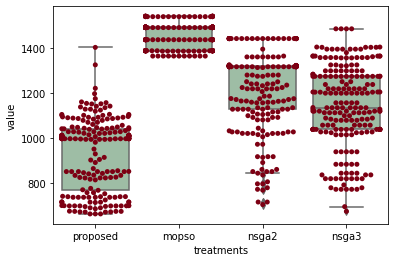

In [ ]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()


**Interpretation of the Box plot for the four controllers:**

Each box represents each controller. There seems to be complications on thise plot. I hope to inestigate further and later.

---



# **One Way ANOVA Test**

*Below id the one-way anova test analysis and results.*

H0: There are no significant differences among final network loss mean produced by the four algorithms at 5% significant level.

H1: At least, one of the algorithms has final network loss mean that is different from others at 5% significant level.

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['proposed'], df['mopso'], df['nsga2'], df['nsga3'])
print(fvalue, pvalue)

print()
if (pvalue < 0.05):
  print(" Decision: Reject the Null hypothesis \n At least, one of the algorithms has final network loss mean that is different from others at 5% significant level.")
else:
  print(" Decision: Accept the Null hypothesis \n There are no significant differences among final network loss mean produced by the four algorithms at 5% significant level.")

print()
print("==================================================================")

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

print()
print("==================================================================")

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

413.7223966048692 2.0079977690725275e-164

 Decision: Reject the Null hypothesis 
 At least, one of the algorithms has final network loss mean that is different from others at 5% significant level.




,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,2.932261e+07,9.774204e+06,413.722397,2.007998e-164
Residual,832.0,1.965602e+07,2.362503e+04,NaN,NaN


**ANOVA TEst Result Interpretation**
*The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.*


---



# **Post HOC TesT: Tukey's HSD test**

*Below is Post- HOC Test using Tukey's HSD test.*

In [ ]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

/usr/local/lib/python3.9/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,proposed,mopso,523.329349,484.623140,562.035558,49.222317,0.001
1,proposed,nsga2,285.580471,246.874261,324.286680,26.860585,0.001
2,proposed,nsga3,206.586748,167.880539,245.292957,19.430744,0.001
3,mopso,nsga2,237.748879,199.042669,276.455088,22.361732,0.001
4,mopso,nsga3,316.742601,278.036392,355.448810,29.791573,0.001
5,nsga2,nsga3,78.993722,40.287513,117.699932,7.429841,0.001


**Interpretation of Post-HOC:** *Above results from Tukey’s HSD suggests that except A-C, all other pairwise comparisons for controller location means rejects null hypothesis (p < 0.05) and indicates statistical significant differences between the pair of final output loss.*

---

## **Normal distribution:**



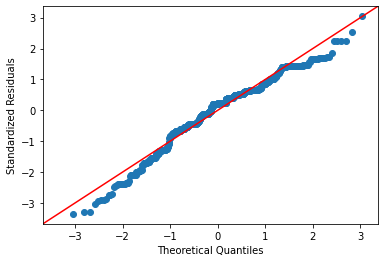

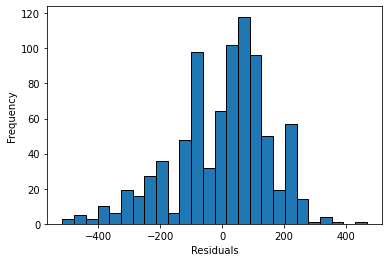

In [ ]:
#Test ANOVA assumptionsPermalink
#ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test, Brown-Forsythe test) 
#and the visual approaches such as residual plots (e.g. QQ-plots) and histograms.

#The visual approaches perform better than statistical tests. For example, the Shapiro-Wilk test has low power for small 
#sample size data and deviates significantly from normality for large sample sizes (say n > 50). For large sample sizes, you 
#should consider to use QQ-plot for normality assumption.

# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

**Interpretation of standardized residuals plot:**
*As the standardized residuals lie closely around the 45-degree line, it suggests that the residuals are are likely to be approximately normally distributed.*

**Interpretation of histogram plot:**
In the histogram, the distribution looks approximately left tailed and suggests that residuals are not like to be approximately normally distributed. 

The normal distrinution and homogenuity teste will be conducted for confirmation of what we suspected in the graph.

---

## **Shapiro-Wilk test for Normality assumption test:**

H0: The dataset is drawn from normal distribution at 5% significant level.

H1: The dataset is not drawn from normal distribution at 5% significant level.

In [ ]:
#Shapiro-Wilk test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

print("==============================")

if (pvalue > 0.05):
  print(" Decision: Accept the Null hypothesis \n Interpretation: The data is drawn from normal distribution at 5% significant level")
else:
  print(" Decision: Reject the Null hypothesis \n Interpretation: The data is NOT drawn from normal distribution at 5% significant level")

0.9675437211990356 1.1072497085873323e-12
 Decision: Reject the Null hypothesis 
 Interpretation: The data is NOT drawn from normal distribution at 5% significant level




---


## **Homogeneity of variances test:**

**H0:** The four Samples, from the populations, have equal variances.

**H1:** The four Samples, from the populations, do not have equal variances.

# **Bartlett's test**
*Below is bartlett's test for equality of variance test.*

In [ ]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['proposed'], df['mopso'], df['nsga2'], df['nsga3'])
print(w, pvalue)

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary
#res.bartlett_summary.values

270.3730332464351 2.5630732141706028e-58


,Parameter,Value
0,Test statistics (T),270.373
1,Degrees of freedom (Df),3.000
2,p value,0.000


# **Levene's test**
*Below is levene's test for equality of variance test.*

In [ ]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),37.4571
1,Degrees of freedom (Df),3.0000
2,p value,0.0000


**Interpretation:**

*As the p value, for both **Bartlett's test (0.0000 < 0.05) and levene test (0.0000 < 0.05)** is significant, we reject the null hypothesis and conclude that four algorithms do not have equal variances.*


---



## **Kruskal-Wallis test**

This test replaces the ANOVA test dues to the violation of the homoscedastisity of variance assumption.

HO: There is no significant differences among network final output loss medians for the four algorithms at 5% significant level.

H1: At least one of the algorithms produces the network final output loss median that is significantly different from other algorithms at 5% significant level.



In [ ]:
from scipy.stats import kruskal

# Separate the data into the groups based on the fourth column
proposed_algorithm = df['proposed']
mopso_algorithm = df['mopso']
nsga2_algorithm = df['nsga2']
nsga3_algorithm = df['nsga3']

# Conduct the Kruskal-Wallis test on the groups
stat, p = kruskal(proposed_algorithm, mopso_algorithm, nsga2_algorithm, nsga3_algorithm)

# Print the results
print('Kruskal-Wallis Test')
print('-------------------')
print('H statistic =', stat)
print('p value =', p)

print()

# If the p-value is less than the significance level (usually 0.05), reject the null hypothesis
if p < 0.05:
    print(' Decision: There is significant evidence to reject the null hypothesis at 5% significant level. \n Conclusion: At least one of the algorithms produces the network final output loss median that is significantly different from other algorithms at 5% significant level')
else:
    print('There is not enough evidence to reject the null hypothesis at 5% significant level. \n Conclusion: There is no significant differences among network final output loss medians for the four algorithms at 5% significant level.')

Kruskal-Wallis Test
-------------------
H statistic = 547.4398221375352
p value = 2.4937473240269875e-118

 Decision: There is significant evidence to reject the null hypothesis at 5% significant level. 
 Conclusion: At least one of the algorithms produces the network final output loss median that is significantly different from other algorithms at 5% significant level


**Since there is evidence that at least one of the algorithms produces the network final output loss median that is significantly different from other algorithms at 5% significant level, hence the test will compare the lagorithms pairwisely using the Pairwise Wilcoxon rank-sum test.**


---



## **Post HOC TesT: Pairwise Wilcoxon rank-sum test**

In [ ]:
from scipy.stats import ranksums

# data for groups A, B, and C
print("The median will be compared for difference. The median for the final output loss for:")
print("Proposed Algorithm   :", df['proposed'].median())
print("Mopso Algorithm      :", df['mopso'].median())
print("NSGA-II Algorithm    :", df['nsga2'].median())
print("NSGA-III Algorithm   :", df['nsga3'].median())
print()

# pairwise comparisons of groups
print("Proposed Algorithm and Mopso Algorithm Comparism")
print("================================================")
print(ranksums(proposed_algorithm, mopso_algorithm))
pvalue1 = ranksums(proposed_algorithm, mopso_algorithm).pvalue
if (pvalue1 < 0.05):
  print("The null hypothesis is rejected. It is concluded that there is significant difference \n between the two median values of the two compared Algorithms at 5% signifiant level. \n This implies that the proposed algorithm has significant low final output loss than the Mopso algorithm at 5% significant level.")
else:
  print("The null hypothesis is accepted. It is concluded that there is no significant difference \n between the two median values of the compared two Algorithms at 5% signifiant level. \n This implies that any obseved difference between the medians of the two compared algorithms is not significant at 5% significant level.")

print()
print("Proposed Algorithm and NSGA-II Algorithm Comparism")
print("================================================")
print(ranksums(proposed_algorithm, nsga2_algorithm))
pvalue2 = ranksums(proposed_algorithm, nsga2_algorithm).pvalue
if (pvalue2 < 0.05):
  print("The null hypothesis is rejected. It is concluded that there is significant difference \n between the two median values of the two compared Algorithms at 5% signifiant level. \n This implies that the proposed algorithm has significant low final output loss than the Mopso algorithm at 5% significant level.")
else:
  print("The null hypothesis is accepted. It is concluded that there is no significant difference \n between the two median values of the compared two Algorithms at 5% signifiant level. \n This implies that any obseved difference between the medians of the two compared algorithms is not significant at 5% significant level.")

print()
print("Proposed Algorithm and NSGA-III Algorithm Comparism")
print("================================================")
print(ranksums(proposed_algorithm, nsga3_algorithm))
pvalue3 = ranksums(proposed_algorithm, nsga3_algorithm).pvalue
if (pvalue3 < 0.05):
  print("The null hypothesis is rejected. It is concluded that there is significant difference \n between the two median values of the two compared Algorithms at 5% signifiant level. \n This implies that the proposed algorithm has significant low final output loss than the Mopso algorithm at 5% significant level.")
else:
  print("The null hypothesis is accepted. It is concluded that there is no significant difference \n between the two median values of the compared two Algorithms at 5% signifiant level. \n This implies that any obseved difference between the medians of the two compared algorithms is not significant at 5% significant level.")

print()
print("NSGA-II Algorithm and NSGA-III Algorithm Comparism")
print("================================================")
print(ranksums(nsga2_algorithm, nsga3_algorithm))
pvalue4 = ranksums(nsga2_algorithm, nsga3_algorithm).pvalue
if (pvalue4 < 0.05):
  print("The null hypothesis is rejected. It is concluded that there is significant difference \n between the two median values of the two compared Algorithms at 5% signifiant level. \n This implies that the proposed algorithm has significant low final output loss than the Mopso algorithm at 5% significant level.")
else:
  print("The null hypothesis is accepted. It is concluded that there is no significant difference \n between the two median values of the compared two Algorithms at 5% signifiant level. \n This implies that any obseved difference between the medians of the two compared algorithms is not significant at 5% significant level.")

print()
print("Mopso Algorithm and NSGA-III Algorithm Comparism")
print("================================================")
print(ranksums(mopso_algorithm, nsga3_algorithm))
pvalue5 = ranksums(mopso_algorithm, nsga3_algorithm).pvalue
if (pvalue5 < 0.05):
  print("The null hypothesis is rejected. It is concluded that there is significant difference \n between the two median values of the two compared Algorithms at 5% signifiant level. \n This implies that the proposed algorithm has significant low final output loss than the Mopso algorithm at 5% significant level.")
else:
  print("The null hypothesis is accepted. It is concluded that there is no significant difference \n between the two median values of the compared two Algorithms at 5% signifiant level. \n This implies that any obseved difference between the medians of the two compared algorithms is not significant at 5% significant level.")

print()
print("Mopso Algorithm and NSGA-II Algorithm Comparism")
print("================================================")
print(ranksums(mopso_algorithm, nsga2_algorithm))
pvalue6 = ranksums(mopso_algorithm, nsga2_algorithm).pvalue
if (pvalue6 < 0.05):
  print("The null hypothesis is rejected. It is concluded that there is significant difference \n between the two median values of the two compared Algorithms at 5% signifiant level. \n This implies that the proposed algorithm has significant low final output loss than the Mopso algorithm at 5% significant level.")
else:
  print("The null hypothesis is accepted. It is concluded that there is no significant difference \n between the two median values of the compared two Algorithms at 5% signifiant level. \n This implies that any obseved difference between the medians of the two compared algorithms is not significant at 5% significant level.")


The median will be compared for difference. The median for the final output loss for:
Proposed Algorithm   : 998.4189305
Mopso Algorithm      : 1492.154173
NSGA-II Algorithm    : 1318.060786
NSGA-III Algorithm   : 1135.833079

Proposed Algorithm and Mopso Algorithm Comparism
RanksumsResult(statistic=-17.636206316605595, pvalue=1.2989416968608584e-69)
The null hypothesis is rejected. It is concluded that there is significant difference 
 between the two median values of the two compared Algorithms at 5% signifiant level. 
 This implies that the proposed algorithm has significant low final output loss than the Mopso algorithm at 5% significant level.

Proposed Algorithm and NSGA-II Algorithm Comparism
RanksumsResult(statistic=-13.538190193544098, pvalue=9.305331701826858e-42)
The null hypothesis is rejected. It is concluded that there is significant difference 
 between the two median values of the two compared Algorithms at 5% signifiant level. 
 This implies that the proposed algorithm